# 分类器+TF-IDF
- 时间复杂度：中
- 空间复杂度：高

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
%matplotlib inline
from b_metrics import metric, Timer
from a_Data_preprocessing import load_xy, vocabs
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from numpy import zeros

D:\Software\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 数据加载、预处理

In [2]:
X_train, X_test, y_train, y_test = load_xy()
dt = Dictionary(X_train)
X_train = [dt.doc2bow(x) for x in X_train]
X_test = [dt.doc2bow(x) for x in X_test]

tfidf = TfidfModel(X_train).idfs  # 字典：ID→TF-IDF向量

def ls_of_w2id(ls_of_wid):
    length = len(ls_of_wid)
    ls_of_idf = zeros((length, vocabs), dtype='float')
    for i in range(length):
        for (wid, cnt) in ls_of_wid[i]:
            ls_of_idf[i, wid] += cnt * tfidf[wid]
    return ls_of_idf  # TF-IDF句向量

X_train = ls_of_w2id(X_train)
X_test = ls_of_w2id(X_test)

### 贝叶斯

                precision    recall  f1-score   support

          car_       0.98      0.96      0.97       409
    education_       0.87      0.86      0.87       410
entertainment_       0.71      0.86      0.78       375
      fashion_       0.80      0.76      0.78       394
      finance_       0.85      0.79      0.82       402
     military_       0.72      0.89      0.80       343
     politics_       0.76      0.64      0.70       400
      science_       0.82      0.75      0.78       372
       sports_       0.99      0.97      0.98       393

     micro avg       0.83      0.83      0.83      3498
     macro avg       0.83      0.83      0.83      3498
  weighted avg       0.84      0.83      0.83      3498



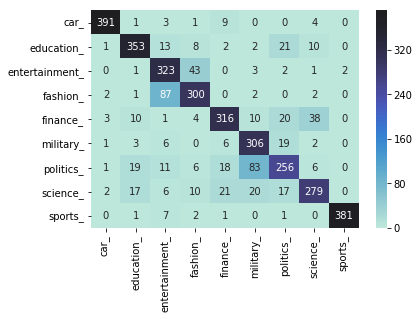

0.86分钟


In [3]:
from sklearn.naive_bayes import MultinomialNB
t = Timer()  # 计时器
clf = MultinomialNB().fit(X_train, y_train)  # 建模训练
y_pred = clf.predict(X_test)  # 预测
metric(y_test, y_pred)  # 评估
del t

### 逻辑回归

                precision    recall  f1-score   support

          car_       0.97      0.94      0.96       409
    education_       0.88      0.90      0.89       410
entertainment_       0.75      0.79      0.77       375
      fashion_       0.74      0.80      0.77       394
      finance_       0.87      0.82      0.84       402
     military_       0.75      0.79      0.77       343
     politics_       0.72      0.72      0.72       400
      science_       0.82      0.75      0.78       372
       sports_       0.98      0.96      0.97       393

     micro avg       0.83      0.83      0.83      3498
     macro avg       0.83      0.83      0.83      3498
  weighted avg       0.84      0.83      0.83      3498



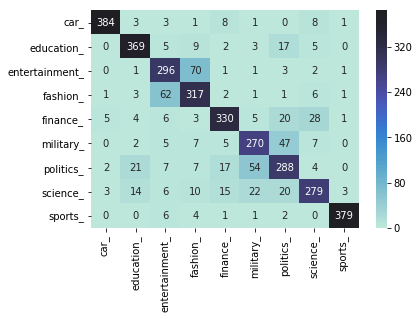

3.06分钟


In [4]:
from sklearn.linear_model import LogisticRegression
t = Timer()  # 计时器
clf = LogisticRegression().fit(X_train, y_train)  # 建模训练
y_pred = clf.predict(X_test)  # 预测
metric(y_test, y_pred)  # 评估
del t